In [6]:
import numpy as np
from cdo import *
cdo = Cdo()        

bbox = '-80,22.5,50,70'
resources = '/home/nils/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-P/historical/day/atmos/day/r1i1p1/v20120315/psl/psl_day_MPI-ESM-P_historical_r1i1p1_20000101-20051231.nc'

In [19]:
# get the North Atlanic region form global dataset
nc  = cdo.sellonlatbox( bbox, input=resources, output='subset.nc' )


In [8]:
from netCDF4 import Dataset, num2date
from flyingpigeon.utils import get_variable

var = get_variable(nc)
print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']
time = ds.variables['time']

variable name: psl


In [9]:
# make array of seasons:
# convert netCDF timesteps to datetime
timestamps = num2date(time[:], time.units, time.calendar)

In [10]:
season = np.zeros(len(time))
month = [int(i.month) for i in timestamps]


In [11]:
def get_season(date):
    """
    convert month to season Nr.
    """
    m = date.month 

    if ((m >= 2) and (m <= 4)):
        s = 1  # spring
    elif ((m >= 5) and (m <= 7)):
        s = 2  # summer
    elif ((m >= 8) and (m <= 10)):
        s = 3  # fall
    elif ((m >= 11) or (m == 1)):
        s = 4  # winter
    else:
        raise IndexError("Invalid date")
    return s

season = [get_season(s) for s in timestamps]

In [12]:
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
# to show the plots inline
%matplotlib inline 

/home/nils/.conda/envs/birdhouse/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


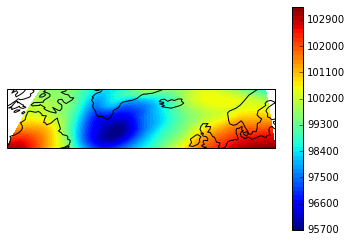

In [13]:
#convert coordinate vectors to meshgrid
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()


In [41]:
#RUN TSNE ON SLP DATA
#Use all datapoints
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [42]:
# reshape
data = np.array(psl)
print data.shape # timestepps, lat, lon

adata = data.reshape(psl[:].shape[0], (psl[:].shape[1] * psl[:].shape[2]) )

(2192, 11, 55)


In [44]:
X_pca = PCA(n_components=50).fit_transform(adata)

In [103]:
X_all = X_pca
y_all = season
X_all_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_all)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2192
[t-SNE] Computed conditional probabilities for sample 2000 / 2192
[t-SNE] Computed conditional probabilities for sample 2192 / 2192
[t-SNE] Mean sigma: 6405.127009
[t-SNE] Iteration 25: error = 1.8672016, gradient norm = 0.0053547
[t-SNE] Iteration 50: error = 1.7664187, gradient norm = 0.0040004
[t-SNE] Iteration 75: error = 1.5107077, gradient norm = 0.0018824
[t-SNE] Iteration 100: error = 1.4646826, gradient norm = 0.0019241
[t-SNE] Error after 100 iterations with early exaggeration: 1.464683
[t-SNE] Iteration 125: error = 1.3950191, gradient norm = 0.0024349
[t-SNE] Iteration 150: error = 1.3754592, gradient norm = 0.0022382
[t-SNE] Iteration 175: error = 1.3700714, gradient norm = 0.0019123
[t-SNE] Iteration 200: error = 1.3688595, gradient norm = 0.0020864
[t-SNE] Iteration 225: error = 1.3691269, gradient norm = 0.0017381
[t-SNE] I

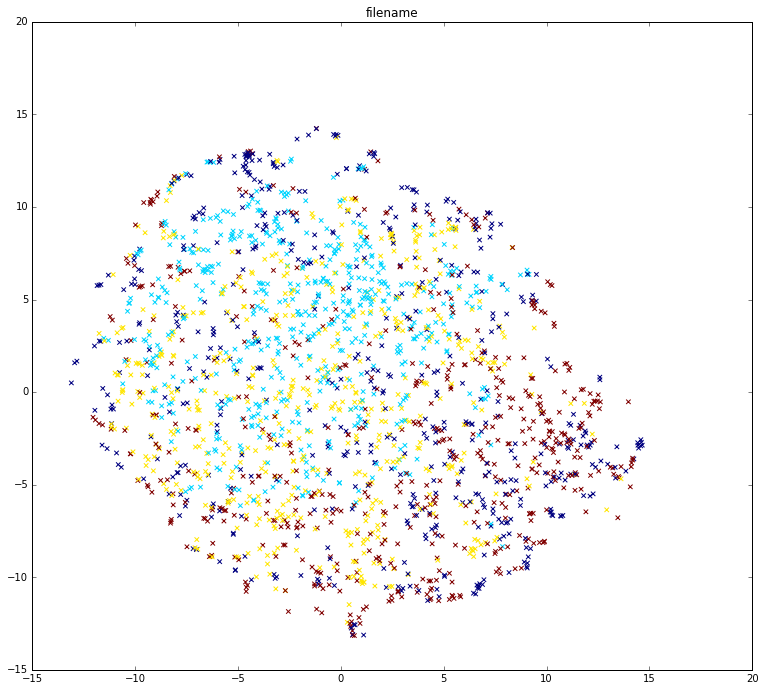

In [108]:
# plot the cluster
# Plotting function

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=True)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

plot_mnist(X_all, y_all, X_all_embedded,"t-SNE", min_dist=20.0)
plt.title('filename')